In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import nose.tools
import operator
import numpy as np

# Data Visualization and Exploratory Data Analysis Lab
## Visualizing and exploring data. Data mining process as a whole

### Problem 1. Read the dataset (1 point)
You'll be exploring data about people's income. Your task is to understand whether there are significant differences in the lifestyle of lower- vs. higher-income groups.

Read the dataset located [here](https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data). The information file is [here](https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names). Save it into the variable `income_data`. Change the column names to what you like. The last column is related to the income class.

Get acquainted with the information file well before starting work.

You don't need to clean the dataset.

In [3]:
income_data = pd.read_table("data/adult.data", sep = r",\s+", engine = "python", header=None)
income_data.columns = ["age","workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours_per_week", "native-country", "income_class"]
income_data.dtypes
income_data


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours_per_week,native-country,income_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
income_data.shape

(32561, 15)

In [5]:
nose.tools.assert_is_not_none(income_data)

### Problem 2. High income (1 point)
How many people have high income (over 50 000 USD per year)? Write a function to return the value. The function should accept the dataframe as a parameter. Work with that parameter.

In [6]:
def get_num_people_with_high_income(dataframe):
    # YOUR CODE HERE
    return dataframe[dataframe["income_class"] == ">50K"]["income_class"].count()

In [7]:
get_num_people_with_high_income(income_data)

7841

In [8]:
income_data.groupby(["income_class"]).income_class.count()

income_class
<=50K    24720
>50K      7841
Name: income_class, dtype: int64

So, we see that our function returns correct output.

In [9]:
# This cell contains hidden tests

### Problem 3. Capital gain: thresholding (1 point)
Plot a histogram of the capital gain. You can see that there are many people with relatively low gains and a few people - with very high gains.

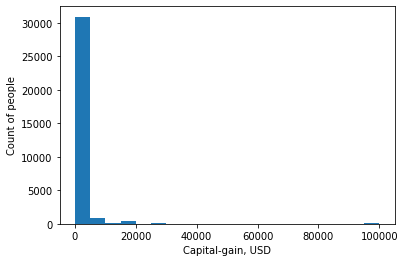

In [10]:
plt.hist(income_data["capital-gain"], bins = 20)
plt.xlabel("Capital-gain, USD")
plt.ylabel("Count of people")
plt.show()

Write a function which accepts a dataframe and a capital gain value (in USD) and returns how many people are there with **greater than or equal to** that threshold gain.

In [11]:
def get_num_people_with_higher_gain(dataframe, threshold_gain):
    return dataframe[dataframe["capital-gain"] >= threshold_gain]["income_class"].count()

In [12]:
nose.tools.assert_equal(get_num_people_with_higher_gain(income_data, 60000), 159)

Create a pie chart of the number of people by marital status.

In [13]:
marital_status_numb_people = income_data.groupby(['marital-status']).size().tolist()
sorted_marital_status_names = sorted(income_data["marital-status"].unique())

The groupby() method returns outcome which is alphabetically sorted. That is why I sort the names of "marital-status". Now the numbers in marital_status_nump_people are in index accordance with the names in sorted_marital_status_names.

In [14]:
marital_status_numb_people

[4443, 23, 14976, 418, 10683, 1025, 993]

In [15]:
sorted_marital_status_names

['Divorced',
 'Married-AF-spouse',
 'Married-civ-spouse',
 'Married-spouse-absent',
 'Never-married',
 'Separated',
 'Widowed']

In [16]:
income_data.groupby(['marital-status'])['marital-status'].count()

marital-status
Divorced                  4443
Married-AF-spouse           23
Married-civ-spouse       14976
Married-spouse-absent      418
Never-married            10683
Separated                 1025
Widowed                    993
Name: marital-status, dtype: int64

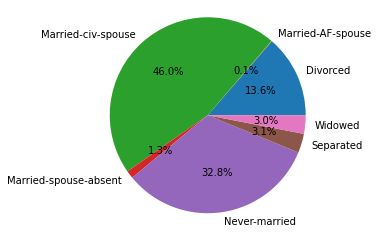

In [17]:
plt.pie(marital_status_numb_people, labels = sorted_marital_status_names, autopct='%1.1f%%')
plt.axis("equal")
plt.show()


If we compare the results, the numbers of the records in the different "marital-status" groups are in accordance with the results from the pie chart.

### Problem 4. Marital status (2 points)
Which type of marital status is the most prominent (i.e. has the most people)? How many are there? Write a function that **calculates and returns the two answers**. 

In [18]:
def most_prominent_marital_status(dataframe):
    status_dict = {}
    index = 0
    for marital_status in sorted_marital_status_names:
        if marital_status_numb_people[index] not in status_dict:
            status_dict[marital_status] = marital_status_numb_people[index]
            index += 1    
    status = max(status_dict.items(), key=operator.itemgetter(1))[0]
    num_people = status_dict[status]        
    return (status, num_people)

In [19]:
most_prominent_marital_status(income_data)

('Married-civ-spouse', 14976)

In accordance with the results above, 'Married-civ-spouse' group is the most prominent status.

In [20]:
(status, num_people) = most_prominent_marital_status(income_data)
nose.tools.assert_not_equal(status, "")
nose.tools.assert_greater(num_people, 10000)

### Problem 5. Age groups (1 point)
Create a histogram of all people's ages. Use the default settings. Add the label "Age" on the x-axis and "Count" on the y-axis.

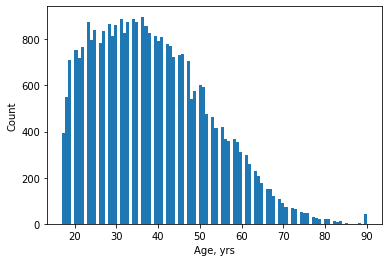

In [21]:
# YOUR CODE HERE
plt.hist(income_data["age"], bins = 100)
plt.xlabel("Age, yrs")
plt.ylabel("Count")
plt.show()

Let's get another view of the data. Split the ages into three:
1. Young people: $\text{age} \le 30$
2. Middle-aged people: $30 < \text{age} \le 60$
3. Old people: $60 < \text{age}$

Return the counts in the following function. Which age group has the most people? How many are there?

In [22]:
young = income_data[income_data["age"] <= 30]["age"].count()
middle_aged = income_data[(income_data["age"] > 30) & (income_data["age"] < 60)]["age"].count()
old = income_data[income_data["age"] > 60]["age"].count()

In [23]:
def get_num_people_by_age_category(dataframe):
    young, middle_aged, old = (dataframe[dataframe["age"] <= 30]["age"].count(), dataframe[(dataframe["age"] > 30) & (dataframe["age"] < 60)]["age"].count(), dataframe[dataframe["age"] > 60]["age"].count())
    return young, middle_aged, old

In [24]:
young, middle_aged, old = get_num_people_by_age_category(income_data)
nose.tools.assert_greater(young, 0)
nose.tools.assert_greater(middle_aged, 0)
nose.tools.assert_greater(old, 0)

Now we can create a bar chart. Execute the code below to see it.

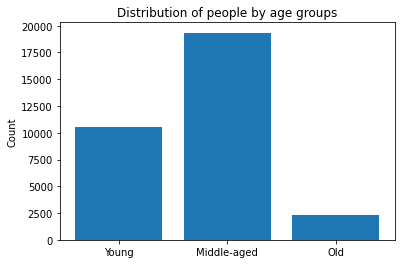

In [25]:
plt.title("Distribution of people by age groups")
plt.bar(range(3), [young, middle_aged, old])
plt.xticks(range(3), ["Young", "Middle-aged", "Old"])
plt.ylabel("Count")
plt.show()

### Problem 6. Native country (2 points)
Have a look at the native country of the people. The highest number of people are, as expected, from the US. What country makes for **the second highest** number of people? How many are they? Write a function to **calculate** and return the answer given a dataframe. DO NOT hardcode the answer, e.g. `return "Germany"`.

In [26]:
categories = income_data["native-country"].unique()
categories

array(['United-States', 'Cuba', 'Jamaica', 'India', '?', 'Mexico',
       'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany',
       'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

In [27]:
country = income_data["native-country"].value_counts()[1:2].index[0]
country

'Mexico'

In [28]:
def get_second_highest_num_people(dataframe):
    country = dataframe["native-country"].value_counts()[1:2].index[0]
    num_people = dataframe[dataframe["native-country"] == country]["native-country"].count()
    return num_people, country

In [29]:
get_second_highest_num_people(income_data)

(643, 'Mexico')

In [30]:
num_people, country = get_second_highest_num_people(income_data)
nose.tools.assert_greater(num_people, 0)
nose.tools.assert_not_equal(country, "")

### Problem 7. Busiest occupations (2 points)
Which people are most overworked? Group all data by occupation and calculate the mean hours per week for each group.

Write a function that **calculates and returns** all mean hours per week as a `Series`. Sort the results in descending order (most hours to fewest hours).

In [31]:
def get_mean_working_hours_by_income(dataframe):
    mean_hours_per_week = dataframe.groupby(["occupation"]).hours_per_week.mean()
    return mean_hours_per_week.sort_values(ascending=False)

In [32]:
hours = get_mean_working_hours_by_income(income_data)
print(hours)
nose.tools.assert_almost_equal(hours["Handlers-cleaners"], 37.95, delta = 0.01)

occupation
Farming-fishing      46.989940
Exec-managerial      44.987703
Transport-moving     44.656230
Protective-serv      42.870570
Prof-specialty       42.386715
Craft-repair         42.304221
Sales                40.781096
Machine-op-inspct    40.755744
Armed-Forces         40.666667
Tech-support         39.432112
Handlers-cleaners    37.947445
Adm-clerical         37.558355
Other-service        34.701669
Priv-house-serv      32.885906
?                    31.906131
Name: hours_per_week, dtype: float64


Finally, let's plot a bar chart. Check the values carefully. If your do not match, feel free to edit the chart generation code below.

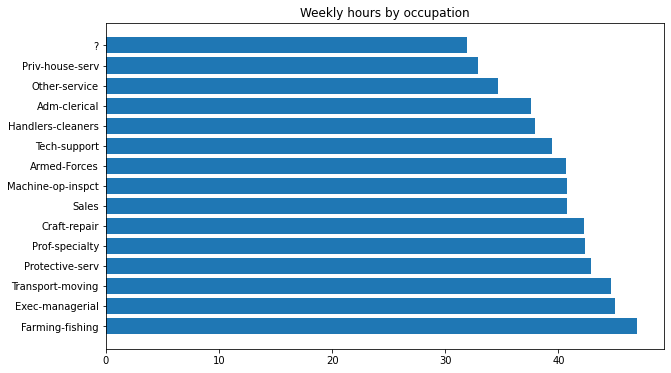

In [33]:
plt.figure(figsize = (10, 6))
plt.title("Weekly hours by occupation")
plt.barh(range(len(hours)), hours)
plt.yticks(list(range(len(hours))), hours.index)
plt.show()